# **Importing Library**

In [1]:
import pandas as pd
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sridhar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sridhar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sridhar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sridhar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Importing all data**
Importing all singers separately

In [2]:
import pymongo
client = pymongo.MongoClient("mongodb://127.0.0.1:27017/?directConnection=true&serverSelectionTimeoutMS=2000&appName=mongosh+1.1.9")
# Database Name
db = client["Lyrics"]
# Collection Name
df_a = db["ArianaGrande"].find()
df_a =  pd.DataFrame(list(df_a))
df_a = df_a.drop(['_id'], axis = 1)

df_b = db["Beyonce"].find()
df_b =  pd.DataFrame(list(df_b))
df_b = df_b.drop(['_id'], axis = 1)

df_be = db["BillieEilish"].find()
df_be =  pd.DataFrame(list(df_be))
df_be = df_be.drop(['_id'], axis = 1)

df_ed = db["EdSheeran"].find()
df_ed =  pd.DataFrame(list(df_ed))
df_ed = df_ed.drop(['_id'], axis = 1)

df_j = db["JustinBieber"].find()
df_j =  pd.DataFrame(list(df_j))
df_j = df_j.drop(['_id'], axis = 1)

df_k = db["KatyPerry"].find()
df_k =  pd.DataFrame(list(df_k))
df_k = df_k.drop(['_id'], axis = 1)

df_l = db["LadyGaga"].find()
df_l =  pd.DataFrame(list(df_l))
df_l = df_l.drop(['_id'], axis = 1)

df_m5 = db["Maroon5"].find()
df_m5 =  pd.DataFrame(list(df_m5))
df_m5 = df_m5.drop(['_id'], axis = 1)

df_p = db["PostMalone"].find()
df_p =  pd.DataFrame(list(df_p))
df_p = df_p.drop(['_id'], axis = 1)

df_r = db["Rihanna"].find()
df_r =  pd.DataFrame(list(df_r))
df_r = df_r.drop(['_id'], axis = 1)

df_s = db["SelenaGomez"].find()
df_s =  pd.DataFrame(list(df_s))
df_s = df_s.drop(['_id'], axis = 1)

df_all=[df_a,df_b,df_be,df_ed,df_j,df_k,df_l,df_m5,df_p,df_r,df_s]


In [3]:
df_all

[            Artist                                       Title  \
 0    Ariana Grande                              ​thank u, next   
 1    Ariana Grande                                     7 rings   
 2    Ariana Grande                             ​God is a woman   
 3    Ariana Grande                                Side To Side   
 4    Ariana Grande                      ​​no tears left to cry   
 ..             ...                                         ...   
 303  Ariana Grande  God is a Woman (Excuse me i love you LIVE)   
 304  Ariana Grande                                      Magic*   
 305  Ariana Grande                                  Right here   
 306  Ariana Grande                                     Venuss*   
 307  Ariana Grande          One last time_Ariana_Grande_(2014)   
 
                Album        Date  \
 0      thank u, next  2018-11-03   
 1      thank u, next  2019-01-18   
 2          Sweetener  2018-07-13   
 3    Dangerous Woman  2016-05-20   
 4       

In [4]:
'''df_a=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/ArianaGrande.csv')
df_b=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/Beyonce.csv')
df_be=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/BillieEilish.csv')
df_ed=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/EdSheeran.csv')
df_j=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/JustinBieber.csv')
df_k=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/KatyPerry.csv')
df_l=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/LadyGaga.csv')
df_m5=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/Maroon5.csv')
df_p=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/PostMalone.csv')
df_r=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/Rihanna.csv')
df_s=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/SelenaGomez.csv')
df_all=[df_a,df_b,df_be,df_ed,df_j,df_k,df_l,df_m5,df_p,df_r,df_s]'''

"df_a=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/ArianaGrande.csv')\ndf_b=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/Beyonce.csv')\ndf_be=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/BillieEilish.csv')\ndf_ed=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/EdSheeran.csv')\ndf_j=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/JustinBieber.csv')\ndf_k=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/KatyPerry.csv')\ndf_l=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source Code/Dataset/csv/LadyGaga.csv')\ndf_m5=pd.read_csv('/Users/sridhar/Desktop/Semester 2/Projects/Lyrics Sentiment Analysis/Source 

# **Cleaning**
* Removing the nan values,unreleased albums and songs sung in any other language than english. 
* Lyrics to words -> To convert all the Lyrics to word 
* To word -> Converts all the words and removes all the repetative words 
*  Count word -> This function can count all the unique and as well non unique words
*  Word stats -> To give the statistics of words.


In [5]:
def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word

    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [6]:
def toword(df):
    def unique(list1):
       # intilize a null list
         unique_list = []
       # traverse for all elements
         for x in list1:
             # check if exists in unique_list or not
             if x not in unique_list:
                  unique_list.append(x)
         return unique_list
    
    #Stores unique words of each lyrics song into a new column called words
    #list used to store the words
    words = []
    #iterate trought each lyric and split unique words appending the result into the words list
    df = df.reset_index(drop=True)
    for word in df['Lyric'].tolist():
        words.append(unique(lyrics_to_words(word).split()))
    #create the new column with the information of words lists
    df['words'] = words
    return df

In [7]:
def cleaning(df):
    a=[]
    i=0
    df1=df
    title = df['Title']
    for t in df['Title']:
        r=Re=l=Li=c=m=V=ve=D=rs=0
        r=t.find('remix')
        Re=t.find('Remix')
        l=t.find('live')
        Li=t.find('Live')
        V=t.find('Version')
        ve=t.find('version')
        D=t.find('Demo ')
        D=t.find('Demo')
        rs=t.find('Reprise')
        c=t.find('COPY')
        m=t.find('Mix')
        if r != -1:
            a.append(t)
        elif Re != -1:
            a.append(t)
        elif l != -1:
            a.append(t)
        elif Li != -1:
            a.append(t)
        elif V != -1:
            a.append(t)
        elif ve != -1:
            a.append(t)
        elif D != -1:
            a.append(t)
        elif rs != -1:
            a.append(t)
        elif c != -1:
            a.append(t)
        elif m != -1:
            a.append(t)
    
    for t1 in df['Title']:
        for t2 in a:
            if t1 == t2:
                df1=df1.drop(i)
        i=i+1
    
    df1.dropna(subset = ["Title"], inplace=True)
    df1.dropna(subset = ["Lyric"], inplace=True)
    df1.drop_duplicates(subset ="Title",keep = False, inplace = True)
    df1.drop_duplicates(subset ="Lyric",keep = False, inplace = True) 
    
    
    return df1

In [8]:
def countword(df):    
    
    c=[]
    for word in df['words']:
        for w in word:
            c.append(w)
    return c


In [9]:
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    name = []
    
    for value in df.columns[1:]:
        unique_words.append(np.count_nonzero(df[value]))
        total_words.append(sum(df[value]))
        name.append(str(value))
        total_news.append(main_df['name'][main_df['name']==value].count())
        data = pd.DataFrame({'name':name,
                          'unique words':unique_words,
                          'total words':total_words,
                          'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

In [10]:
df_allc=[]
for df in df_all:
    df_c=cleaning(df)
    df_w=toword(df_c)
    df_allc.append(df_w)

frames=df_allc
df_main = pd.concat(frames,ignore_index=True)
df_main.dropna(thresh=1)
#df_main= df_main.drop(df_main[(df_main.Year < 1000) | (df_main.Year > 2021)].index)
#df_main= df_main.drop(['Unnamed: 0'],axis=1)
df_main=df_main.reset_index(drop=True)

In [11]:
df_main

,Artist,Title,Album,Date,Lyric,Year,words,
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018,"[thought, id, end, sean, match, wrote, song, r...",NaN
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019,"[yeah, breakfast, tiffany, bottle, bubble, gir...",NaN
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018,"[love, move, touch, one, said, done, believe, ...",NaN
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016,"[ariana, grande, nicki, minaj, ive, night, day...",NaN
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018,"[right, im, state, mind, wanna, like, time, ai...",NaN
...,...,...,...,...,...,...,...,...
2000,Selena Gomez,Top Secrets,NaN,2021-01-10,got some top secrets am text me back baby yo...,2021,"[got, top, secret, text, back, baby, youre]",156
2001,Selena Gomez,My World,NaN,2021-03-01,my world you tried to change it all but i said...,2021,"[world, tried, change, said, hey, let, take, s...",161
2002,Selena Gomez,’Til I Finally Met the Moon*,NaN,nan,snippet my heart skipped a beat when you smile...,nan,"[snippet, heart, skipped, beat, smiled, til, f...",163
2003,Selena Gomez,Wildest dreams,NaN,2015-08-31,he said let's get out of this town drive out o...,2015,"[said, let, get, town, drive, city, away, crow...",166


##### *After appling all the function we generate a main dataframe.*
<br></br>
# **Preparing Data for visualization**

* The first visualization we'll look at it how many unique word vs total words these artist uses and lexicalrichness of each artist

In [16]:
before=[]
after=[]
length=[]
ulength=[]
wd=[]

for df in df_all:
    a,b=df.shape
    before.append(a)
    
for dfc in df_allc:
    a,b=dfc.shape
    after.append(a)  
    c=countword(dfc)
    l=len(c)
    ul=len(np.unique(c))
    wd.append(c)
    length.append(l)
    ulength.append(ul)

In [17]:
artists=['ArianaGrande','Beyonce','BillieEilish','EdSheeran','JustinBieber','KatyPerry','LadyGaga','Maroon5','PostMalone','Rihanna','SelenaGomez']
df_info =pd.DataFrame({'name':artists,'before':before,'after':after,'words':wd,'unique words':ulength,'word count':length})
df_info['diff']=df_info['before']-df_info['after']
df_info['words per songs'] = round(df_info['word count'] / df_info['after'],0)
df_info['words per songs'] = df_info['words per songs'].astype('int')
df_info['lexicalrichness']=(df_info['unique words']/df_info['word count'])*100
df_info=df_info[['name','before','after','diff','words','words per songs','unique words','word count','lexicalrichness']]
df_info

,name,before,after,diff,words,words per songs,unique words,word count,lexicalrichness
0,ArianaGrande,308,202,106,"[thought, id, end, sean, match, wrote, song, r...",65,3394,13193,25.725764
1,Beyonce,406,224,182,"[beyoncé, ive, drinkin, get, filthy, liquor, t...",85,4980,19041,26.154089
2,BillieEilish,145,73,72,"[know, im, good, ive, learned, lose, cant, aff...",51,1519,3720,40.833333
3,EdSheeran,296,202,94,"[club, best, place, find, lover, bar, go, frie...",92,4490,18650,24.075067
4,JustinBieber,348,268,80,"[produced, benny, blanco, time, rained, parade...",70,3752,18659,20.108259
5,KatyPerry,325,191,134,"[refrain, know, strut, fuck, katy, perry, tige...",69,3605,13202,27.306469
6,LadyGaga,402,236,166,"[lady, gaga, r, kelly, yeah, oh, turn, mic, eh...",73,4299,17147,25.071441
7,Maroon5,197,125,72,"[adam, levine, say, hey, baby, oh, mama, play,...",62,1841,7724,23.834801
8,PostMalone,148,128,20,"[post, malone, hahahahaha, tank, god, ayy, ive...",85,3091,10823,28.559549
9,Rihanna,405,248,157,"[rihanna, work, said, haffi, see, mi, dirt, pu...",66,2869,16391,17.503508


In [18]:
fig = go.Figure(data=[
    go.Bar(name='Unique Word Count', x=df_info['name'], y=df_info['unique words'].tolist()),
    go.Bar(name='Total Word Count', x=df_info['name'], y=df_info['word count'].tolist()),
    
])
# Change the bar mode
fig.update_layout(barmode='group',title={'text': "Total words vs Unique words",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [19]:
print(df_info[df_info.lexicalrichness == max(df_info['lexicalrichness'])].loc[:,'name'])
print(max(df_info['lexicalrichness']))
fig = px.bar(df_info, x='name',y='lexicalrichness')
fig.update_layout(title={'text': "Lexicalrichness of all artist",'y':1,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

2    BillieEilish
Name: name, dtype: object
40.833333333333336


* Now dividing the mail data frame to visualize how many songs artist sings over a year

In [20]:
df_group=df_main.groupby(['Artist','Year']).count().iloc[:,0:2]
#df_group=df_group.drop("Unnamed: 0",axis=1)
df_group =df_group.reset_index()
df_group

,Artist,Year,Title,Album
0,Ariana Grande,2008,3,3
1,Ariana Grande,2009,2,1
2,Ariana Grande,2010,4,2
3,Ariana Grande,2011,6,1
4,Ariana Grande,2012,4,2
...,...,...,...,...
162,Selena Gomez,2018,3,1
163,Selena Gomez,2019,4,2
164,Selena Gomez,2020,14,14
165,Selena Gomez,2021,6,1


In [21]:
df_temp= df_group.drop('Artist',axis=1)
df_temp=df_temp.groupby(['Year']).count()
df_temp=df_temp.reset_index()
fig = px.line(df_temp, x='Year',y='Title')
fig.update_layout(title={'text': "No. of Titles by all artist from 2001-2021",'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

* Now let's look at the above visualization with respect to each artist.

Text(0.5, 1.0, 'Selena Gomez')

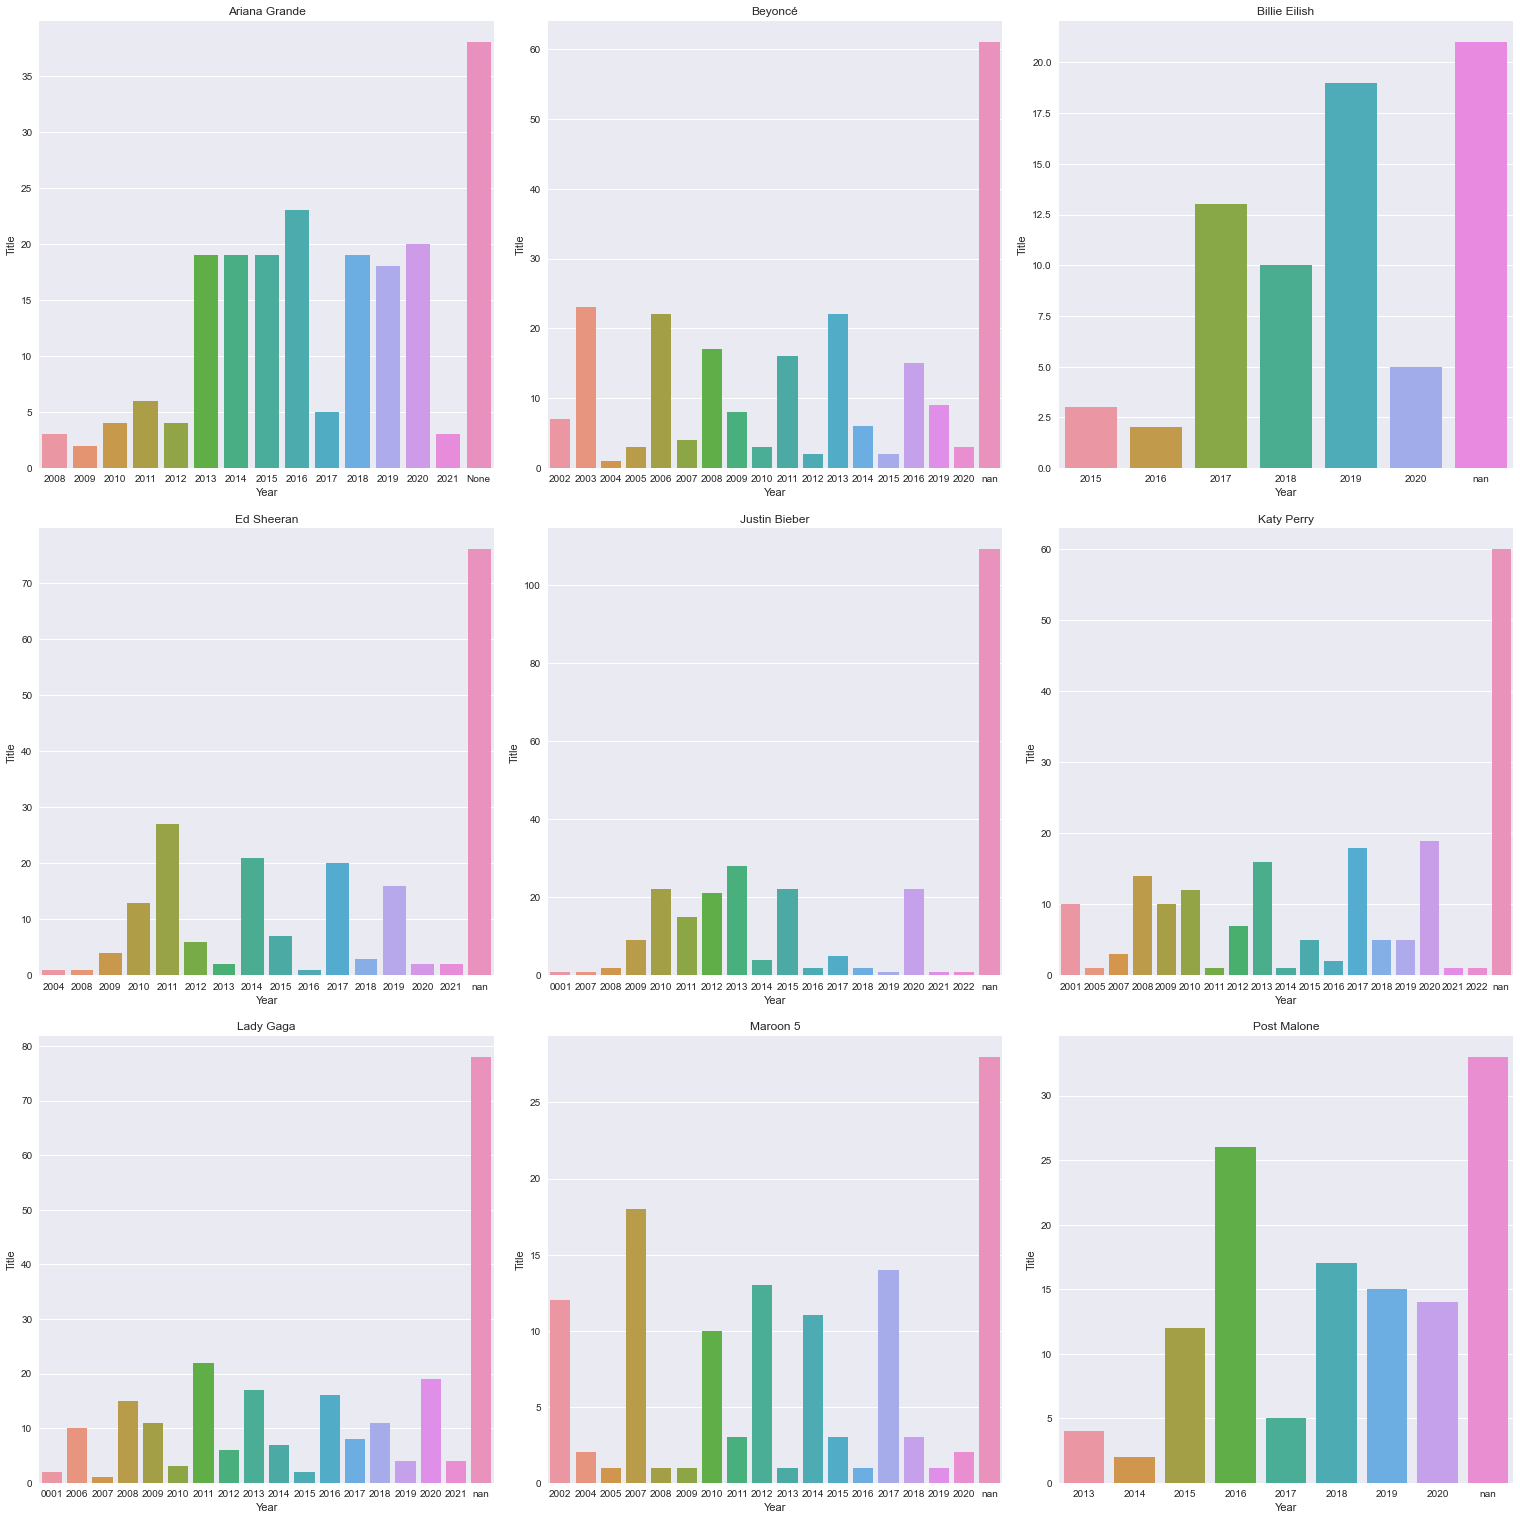

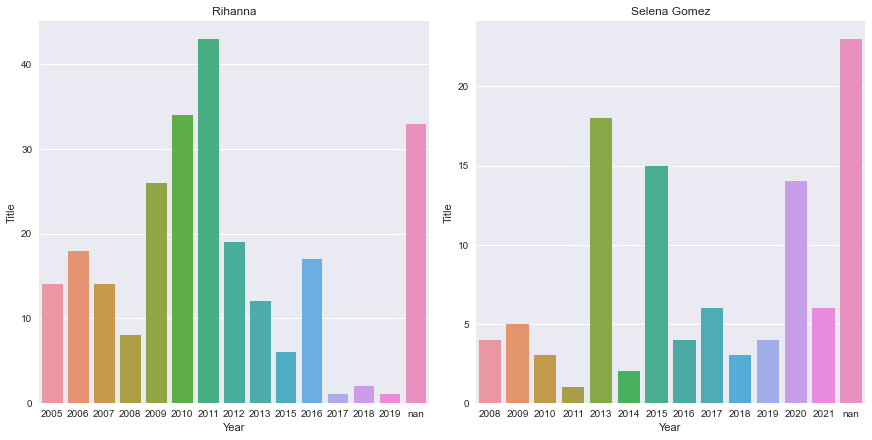

In [22]:
df_temp=[]
name=df_main['Artist'].unique()
name=name[0:9]
num_plots = 9
total_cols = 3
total_rows = 3
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for artist in df_main['Artist'].unique():
    df_temp.append(df_group[df_group['Artist']==artist])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(data=df_temp[i],x="Year", y="Title",ax=axs[row][pos])
    axs[row][pos].set_title(name[i])


name=df_main['Artist'].unique()
name=name[9:11]
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(12, 6), constrained_layout=True)
plot = sns.barplot(data=df_temp[9],x="Year", y="Title",ax=axs[0])
axs[0].set_title(name[0])
plot = sns.barplot(data=df_temp[10],x="Year", y="Title",ax=axs[1])
axs[1].set_title(name[1])

# Sentiment Analysis
Now we will analyze the sentiment of each song

Analysis is done with a function SentimentIntensityAnalyzer 

In [23]:

#Create lists to store the different scores for each word
def setimentanalyzer(df):
    neg='Negative'
    neu='Neutral'
    pos='Positive'
    negative = []
    neutral = []
    positive = []
    dominant_sentiment=[]
    dominant_sentiment_score=[]
    #Initialize the model
    sid = SentimentIntensityAnalyzer()
    #Iterate for each row of lyrics and append the scores
    for i in df.index:
       
        scores = sid.polarity_scores(df['Lyric'].iloc[i])
        negative.append(scores['neg'])
        neutral.append(scores['neu'])
        positive.append(scores['pos'])
        if scores['neg']>scores['pos']:
            dominant_sentiment_score.append(scores['neg'])
            dominant_sentiment.append(neg)
        elif scores['neg']<scores['pos']:
            dominant_sentiment_score.append(scores['pos'])
            dominant_sentiment.append(pos)
        else:
            dominant_sentiment_score.append(scores['neu'])
            dominant_sentiment.append(neu)
    #Create 5 columns to the main data frame  for each score
    df['negative'] = negative
    df['neutral'] = neutral
    df['positive'] = positive
    df['dominant_sentiment']=dominant_sentiment
    df['dominant_sentiment_score']=dominant_sentiment_score
    return df

In [24]:
df_sentiment=setimentanalyzer(df_main)
df_sentiment.head(5)

,Artist,Title,Album,Date,Lyric,Year,words,,negative,neutral,positive,dominant_sentiment,dominant_sentiment_score
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018,"[thought, id, end, sean, match, wrote, song, r...",NaN,0.062,0.503,0.435,Positive,0.435
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019,"[yeah, breakfast, tiffany, bottle, bubble, gir...",NaN,0.070,0.650,0.280,Positive,0.280
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018,"[love, move, touch, one, said, done, believe, ...",NaN,0.000,0.733,0.267,Positive,0.267
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016,"[ariana, grande, nicki, minaj, ive, night, day...",NaN,0.062,0.865,0.073,Positive,0.073
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018,"[right, im, state, mind, wanna, like, time, ai...",NaN,0.079,0.716,0.204,Positive,0.204


Now based on the above table we do the follwing analyisis where we find out the dominant sentiment of each artist

Text(0.5, 1.0, 'Selena Gomez')

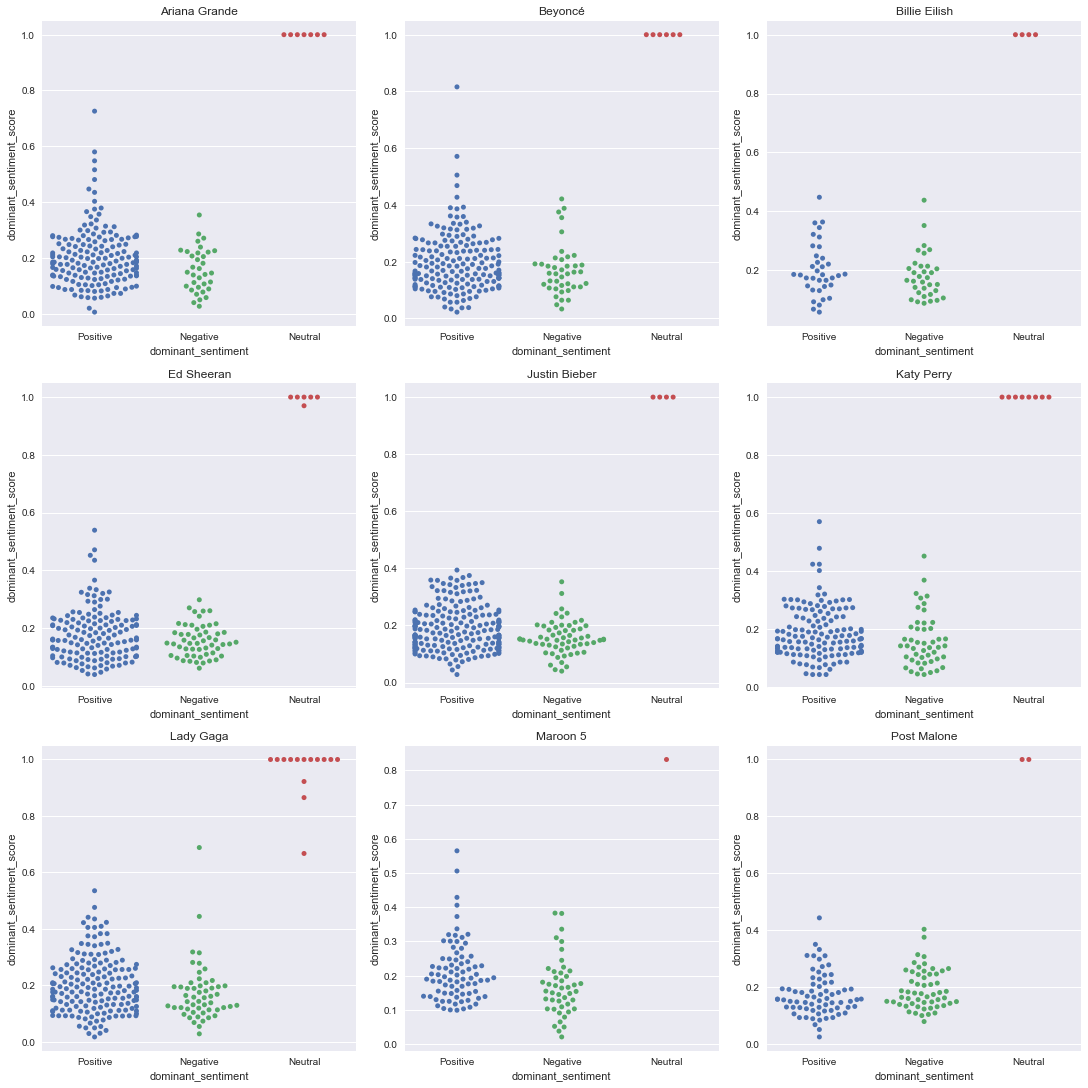

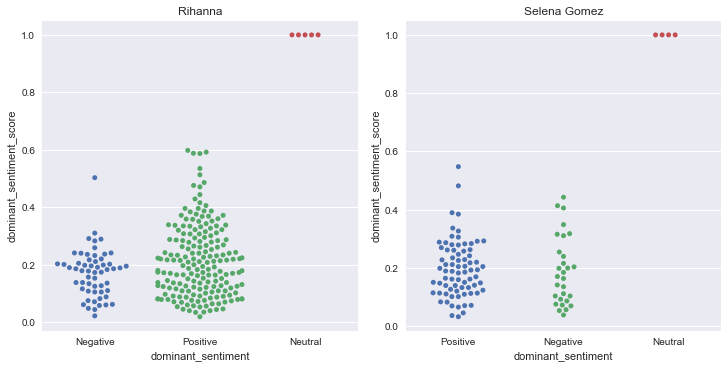

In [25]:
df_temp=[]
name=df_sentiment['Artist'].unique()
name=name[0:9]
num_plots = 9
total_cols = 3
total_rows = 3
#fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for artist in df_main['Artist'].unique():
    df_temp.append(df_sentiment[df_sentiment['Artist']==artist])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.swarmplot(data=df_temp[i], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[row][pos])
    axs[row][pos].set_title(name[i])
    
name=df_main['Artist'].unique()
name=name[9:11]
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(10, 5), constrained_layout=True)
plot = sns.swarmplot(data=df_temp[9], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[0])
axs[0].set_title(name[0])
plot = sns.swarmplot(data=df_temp[10], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[1])
axs[1].set_title(name[1])

In [26]:
means_df = df_sentiment.groupby(['Artist']).mean()
means_df

,negative,neutral,positive,dominant_sentiment_score
Artist,,,,
Ariana Grande,0.072847,0.750421,0.176683,0.224144
Beyoncé,0.076330,0.752429,0.171277,0.213424
Billie Eilish,0.118247,0.746260,0.135493,0.236562
Ed Sheeran,0.088698,0.762545,0.148752,0.196921
Justin Bieber,0.075388,0.761220,0.163377,0.193769
Katy Perry,0.086000,0.763984,0.150063,0.212995
Lady Gaga,0.090178,0.744915,0.164949,0.240335
Maroon 5,0.108960,0.729224,0.161856,0.201720
Post Malone,0.126906,0.733523,0.139562,0.195805


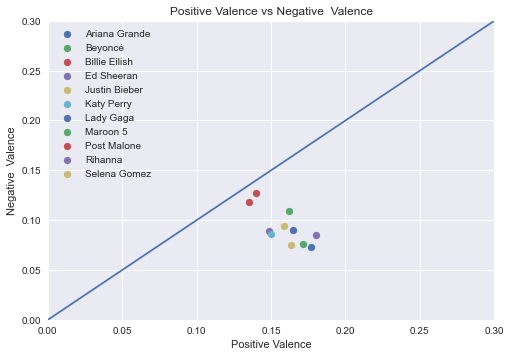

In [27]:
x = np.linspace(0, 10, 1000)
for name, group in means_df.groupby('Artist'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()
plt.xlim([0,0.3])
plt.ylim([0,0.3])
plt.plot(x, x+0, linestyle='solid')
plt.title("Positive Valence vs Negative  Valence")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()#positive and negative region